In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

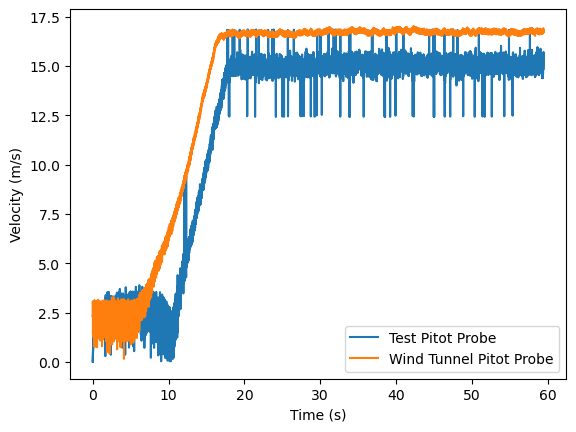

In [43]:
rho = 1.15
convFac = 1.016 #Volts -> mmHg

wind_tunnel_probe = pd.read_csv('wind_tunnel_6_27_23/Wind_Tunnel_Tube/PitotV0100.csv')
col_name = 'TaredBaratronVoltage'
volt_data = wind_tunnel_probe[col_name]
num_volt_pts = len(volt_data)

for i in range(num_volt_pts):
    try:
        volt_data[i] = math.sqrt((2*volt_data[i]*133.322*convFac)/1.15)
    except ValueError:
        volt_data[i] = volt_data[i-1]

test_probe = pd.read_excel('wind_tunnel_6_27_23/Test_Tube/PyV0100.xlsx')
vel_col = 'Velocity (m/s)'
time_col = 'Time Elapsed'

vel_data = test_probe[vel_col]
time_data = test_probe[time_col]
vel_data[0] = 0
time_data[0] = 0
vel_data[7] = 0
time_data[7] = 0
num_time_pts = len(time_data)
time_end = time_data[num_time_pts-1]

volt_time_data = np.linspace(0,time_end, num_volt_pts)

fig, ax = plt.subplots()

ax.plot(time_data,vel_data, label='Test Pitot Probe')
ax.plot(volt_time_data,volt_data, label='Wind Tunnel Pitot Probe')

ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show()



(0.0, 250.0)

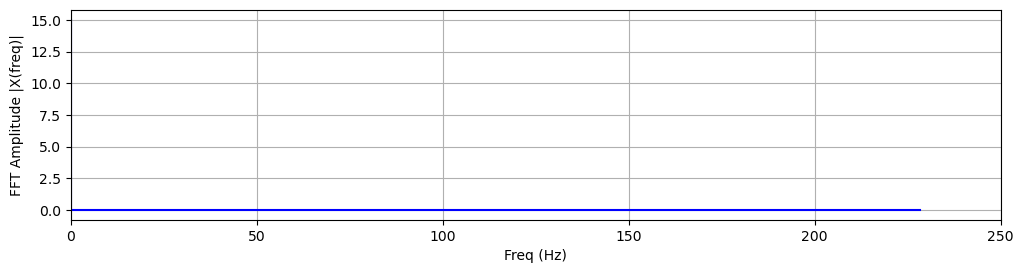

In [58]:
#8726 time data index to truncate from
#19701 volt time data index to truncate from
fullspeed = vel_data[8726:len(vel_data)]

sampling_rate = len(fullspeed)/(time_end-time_data[8726])

time_fullspeed = time_data[8726:len(time_data)]

Y = np.fft.fft(fullspeed) #Fourier of f
N = len(Y) #num_pts -> data length
n = np.arange(N) 
T = N/sampling_rate
freq = sampling_rate * np.arange(0, int(N/2))/N  

P2 = np.abs(Y/N);
P1 = P2[0:int(N/2)]
P1[1:-2] = 2*P1[1:-2]


plt.figure(figsize = (12, 6))
plt.subplot(211)

plt.stem(freq, P1 , 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.grid()
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 250)